<a href="https://colab.research.google.com/github/om-shankar-ucr/googleColab/blob/main/EE260_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import sys
import time
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# To download MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshape data according to requirement
train_images = x_train.reshape(x_train.shape[0], 784)
test_images = x_test.reshape(x_test.shape[0], 784)

train_images = np.asfarray(train_images[:50000,:])*(1/255)
train_labels = y_train[:50000]
train_labels = train_labels.reshape((50000,1))
test_images = np.asfarray(test_images[:10000,:])*(1/255)
test_labels = y_test[:10000]
test_labels = test_labels.reshape((10000,1))

# display data
# for i in range(5):
#     im = train_images[i].reshape((28,28))
#     plt.imshow(im, cmap='gray')
#     plt.show()
#     print(train_labels[i])

#Creating a 10 dimensional label for each data in Train and Test set
classes = np.arange(10)
train_classes = (classes == train_labels).astype(np.int)
test_classes = (classes == test_labels).astype(np.int)

In [ ]:
# Function to perform SGD on a batch of train data
def minibatch_sgd_new(W, train_images, train_labels, batch_size):
    batch_loss = 0

    # Predicting label in a batch
    predict = np.matmul(W,np.transpose(train_images))
    predict = np.transpose(train_labels) - predict

    # Calculating squared loss
    sq = np.square(predict)
    loss = sum(sum(sq))/(2*batch_size)

    # Calculatung gradient
    dg = -np.matmul(predict,train_images)
    dg = np.true_divide(dg,batch_size)
    return dg, loss

In [ ]:
# Function to calculate Train loss and Test accuracy
def accuracy_loss_new(W, x, y):
    # W = np.transpose(W)

    predict = np.matmul(W, np.transpose(x))
    predict_1 = np.transpose(y) - predict
    
    # Total Loss
    sq = np.square(predict_1)
    loss = sum(sum(sq))/(2*x.shape[0])
    
    # Accuracy
    y_predict = np.argmax(predict,axis=0)
    y1 = np.argmax(y,axis=1)
    accuracy = sum(y_predict == y1)/float(len(y))

    return loss, accuracy

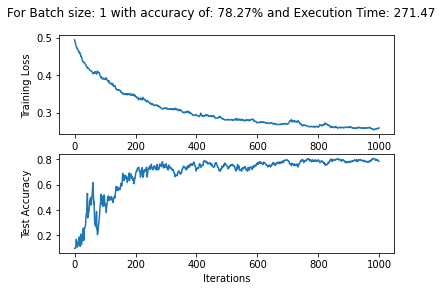

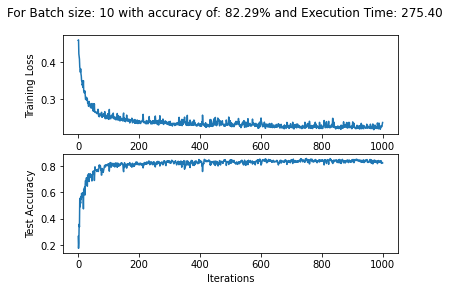

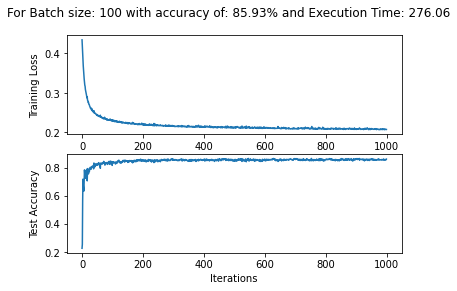

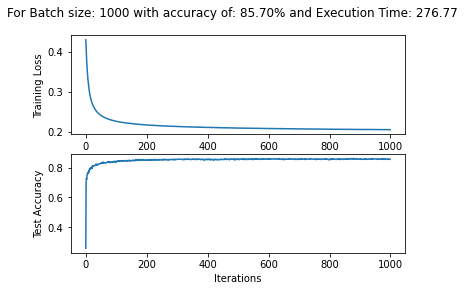

In [ ]:
## Start of Training and accuracy and loss calculator to determin the role of Batch Size

batch_size = [1, 10, 100, 1000]
batches = 1000
step_size = [0.001, 0.015, 0.025, 0.025]

best_acc_list = np.zeros(len(batch_size))

# Set random seed
np.random.seed(42)

# Iteration on Batch size
for i in np.arange(len(batch_size)):
    
    # List for storing training loss and test accuracy for each batch
    train_loss = np.zeros( batches)
    test_accuracy = np.zeros(batches)
        
    # Weights initiated with zeros
    W = np.zeros((train_classes.shape[1],train_images.shape[1]))

    initial_time = time.time()
    # Iterating on batches
    for j in range(batches):

        # Create random indices
        rand_index = np.random.choice(train_images.shape[0], batch_size[i], replace=True)
        # index = rand_index[j*batch_size:(j+1)*batch_size]
        train_batch_image = train_images[rand_index]
        train_batch_label = train_classes[rand_index]

        # Get the gradient decent and batch loss
        dw, batch_loss_single = minibatch_sgd_new(W, train_batch_image, train_batch_label,batch_size[i])
        
        # Updating weights
        W = W - step_size[i]*dw

        # Get Train loss with each updated weights 
        batch_loss_single, accuracy_single = accuracy_loss_new(W, train_images, train_classes)
        train_loss[j] = batch_loss_single

        # Get Test accuracy with each updated weights
        batch_loss_single, accuracy_single = accuracy_loss_new(W, test_images, test_classes)
        test_accuracy[j] = accuracy_single

    final_time = time.time() - initial_time
    final_time = "{:.2f}".format(final_time)
    # Best Learning rate
    final_acc = "{:.2f}".format(100*(test_accuracy[-1]))
    a = "For Batch size: "+str(batch_size[i])+" with accuracy of: "+str(final_acc)+"% "+"and Execution Time: "+final_time

    # Ploting Training Loss
    plt.subplot(211)
    plt.plot(train_loss)
    plt.ylabel("Training Loss")
    plt.xlabel("Iterations")
    
    # Ploting Test accuracy
    plt.subplot(212)
    plt.plot(test_accuracy)
    plt.ylabel("Test Accuracy")
    plt.xlabel("Iterations")
    
    plt.suptitle(a)
    plt.show()

**Role of Batch Size:**
For a fixed number of iterations, as the batch size is increasing the accuracy increases. But as the product of batch size and number of iterations are getting closer to dataset size then the accuracy stabilizes.

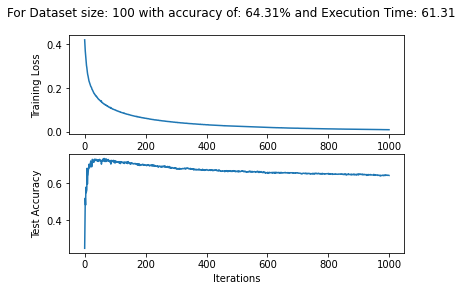

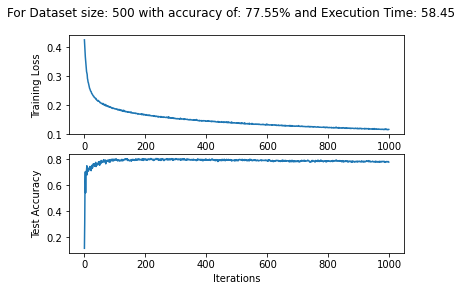

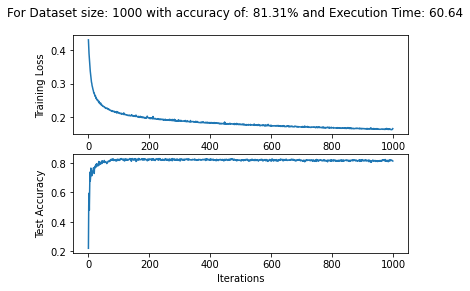

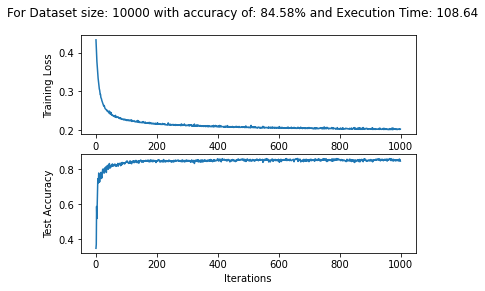

In [ ]:
## Start of Training and accuracy and loss calculator to determin Role of dataset size
batch_size = 100
batches = 1000
step_size = 0.025
dataset_size = [100, 500, 1000, 10000]

# Set random seed
np.random.seed(42)

# Iteration on Batch size
for i in np.arange(len(dataset_size)):
    
    # List for storing training loss and test accuracy for each batch
    train_loss = np.zeros(batches)
    test_accuracy = np.zeros(batches)
        
    # Weights initiated with zeros
    W = np.zeros((train_classes.shape[1],train_images.shape[1]))

    # Get random indices
    rand_index = np.random.choice(train_images.shape[0], dataset_size[i], replace=False)
    train_batch_image = train_images[rand_index]
    train_batch_label = train_classes[rand_index]

    initial_time = time.time()

    # Iterating on batches
    for j in range(batches):
        batch_rand_index = np.random.choice(train_batch_image.shape[0], batch_size, replace=True)

        train_small_batch_image = train_batch_image[batch_rand_index]
        train_small_batch_label = train_batch_label[batch_rand_index]

        # Get the gradient decent and batch loss
        dw, batch_loss_single = minibatch_sgd_new(W, train_small_batch_image, train_small_batch_label,batch_size)
        
        # Updating weights
        W = W - step_size*dw

        # Get Train loss with each updated weights 
        batch_loss_single, accuracy_single = accuracy_loss_new(W, train_batch_image, train_batch_label)
        train_loss[j] = batch_loss_single

        # Get Test accuracy with each updated weights
        batch_loss_single, accuracy_single = accuracy_loss_new(W, test_images, test_classes)
        test_accuracy[j] = accuracy_single

    final_time = time.time() - initial_time
    final_time = "{:.2f}".format(final_time)

    # Best Learning rate
    final_acc = "{:.2f}".format(100*(test_accuracy[-1]))
    a = "For Dataset size: "+str(dataset_size[i])+" with accuracy of: "+str(final_acc)+"% "+"and Execution Time: "+final_time

    # Ploting Training Loss
    plt.subplot(211)
    plt.plot(train_loss)
    plt.ylabel("Training Loss")
    plt.xlabel("Iterations")
    
    # Ploting Test accuracy
    plt.subplot(212)
    plt.plot(test_accuracy)
    plt.ylabel("Test Accuracy")
    plt.xlabel("Iterations")
    
    plt.suptitle(a)
    plt.show()

**Role of Dataset Size:**
As we train on bigger dataset set our model becomes more accurate in predicting and we get higher accuracy on test data.

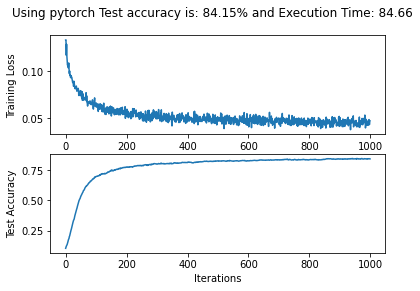

In [ ]:
import torch
from torch.autograd import Variable

batch_size = 100
batches = 1000
step_size = 0.025
train_loss=[];
test_accuracy=[];

# Linear model for SGD
linear = torch.nn.Linear(784, 10)
# Loss calculated using Mean Square Loss
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(linear.parameters(), lr = step_size)
test_classes_tensor = Variable(torch.from_numpy(test_classes))

initial_time = time.time()
for i in range(batches):

    batch_rand_index=np.random.choice(train_images.shape[0], batch_size, replace=True)
    train_batch_image=train_images[batch_rand_index]
    train_batch_label=train_classes[batch_rand_index]
    input_images = Variable(torch.from_numpy(train_batch_image))
    labels = Variable(torch.from_numpy(train_batch_label))

    # Initializing Model
    optimiser.zero_grad()

    # Prediction
    out = linear(input_images.float())
    # Training loss
    loss = criterion(out, labels.float())

    # Gradient for that batch
    loss.backward()
    # Gradient update
    optimiser.step()
    train_loss.append(loss)

    test_image_tensor=Variable(torch.from_numpy(test_images))
    # Prediction on test images
    predict = linear(test_image_tensor.float())
    val1, y_predict = torch.max(predict,1)
    val2, y = torch.max(test_classes_tensor,1)
    # Test accuracy
    test_accuracy.append(sum(y_predict == y)/float(len(y)))

final_time = time.time() - initial_time
final_time = "{:.2f}".format(final_time)

final_acc = "{:.2f}".format(100*(test_accuracy[-1]))
a = "Using pytorch Test accuracy is: "+str(final_acc)+"% "+"and Execution Time: "+final_time

plt.subplot(211)
plt.plot(train_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')

plt.subplot(212)
plt.plot(test_accuracy)
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.suptitle(a)
plt.show()